# Frequency Graphs

In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from nltk.stem import WordNetLemmatizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('Dataset/all_v1_transpose.csv')
df

,doc,id,original_text,reference_summary,title,uid,case_code,case_text,note,title_code,title_text,urls,tldr_code,tldr_text
0,Pokemon GO Terms of Service,5786730a6cca83a54c0035b7,welcome to the pokémon go video game services ...,hi.,NaN,legalsum01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pokemon GO Terms of Service,57866df76cca83a54c0035a1,by using our services you are agreeing to thes...,by playing this game you agree to these terms....,Agreement To Terms,legalsum02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pokemon GO Terms of Service,5786730a6cca83a54c0035b6,if you want to use certain features of the ser...,you have to use google pokemon trainer club or...,Eligibility and Account Registration,legalsum03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pokemon GO Terms of Service,57866df76cca83a54c0035a0,during game play please be aware of your surro...,don t die or hurt others and if you do it s no...,Safe Play,legalsum04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon GO Terms of Service,57866df76cca83a54c00359f,subject to your compliance with these terms ni...,don t copy modify resell distribute or reverse...,Rights in App,legalsum05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Privacy Policy,NaN,third party vendors including google use cooki...,this service allows tracking via third party c...,NaN,tosdr417,NaN,NaN,NaN,"1,s",This service allows tracking via third-party c...,{'icepop.com'},NaN,NaN
442,Privacy Policy,NaN,the third parties that display advertisements ...,this service employs third party cookies but w...,NaN,tosdr418,NaN,NaN,NaN,"1,s","This service employs third-party cookies, but ...",{'icepop.com'},NaN,NaN
443,Privacy Policy,NaN,we may make use of third party service provide...,third parties may be involved in operating the...,NaN,tosdr419,NaN,NaN,NaN,"1,s",Third parties may be involved in operating the...,{'icepop.com'},NaN,NaN
444,Privacy Policy,NaN,please be aware that we may transfer your info...,your data may be processed and stored anywhere...,NaN,tosdr420,NaN,NaN,NaN,"1,s",Your data may be processed and stored anywhere...,{'icepop.com'},NaN,NaN


In [3]:
to_drop = ['id', 'doc', 'title', 'uid', 'case_code', 'case_text', 'note', 'title_code', 'title_text', 'urls', 'tldr_code', 'tldr_text']
df.drop(to_drop, axis = 1, inplace = True)
df.head()

,original_text,reference_summary
0,welcome to the pokémon go video game services ...,hi.
1,by using our services you are agreeing to thes...,by playing this game you agree to these terms....
2,if you want to use certain features of the ser...,you have to use google pokemon trainer club or...
3,during game play please be aware of your surro...,don t die or hurt others and if you do it s no...
4,subject to your compliance with these terms ni...,don t copy modify resell distribute or reverse...


In [4]:
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [5]:
df['original_text'] = df['original_text'].apply(remove_punctuation)
df['reference_summary'] = df['reference_summary'].apply(remove_punctuation)

In [6]:
original_text = list(df['original_text'])
reference_summary = list(df['reference_summary'])

In [7]:
orig_tokens = []
for text in original_text:
    orig_tokens.extend(nltk.word_tokenize(text.lower()))

ref_tokens = []
for text in reference_summary:
    ref_tokens.extend(nltk.word_tokenize(text.lower()))

In [8]:
stop_words = set(stopwords.words('english'))
orig_filtered_tokens = [token for token in orig_tokens if token not in stop_words]
ref_filtered_tokens = [token for token in ref_tokens if token not in stop_words]

In [9]:
orig_word_freq = Counter(orig_filtered_tokens)
ref_word_freq = Counter(ref_filtered_tokens)

In [10]:
orig_top_words = orig_word_freq.most_common(30)
ref_top_words = ref_word_freq.most_common(30)

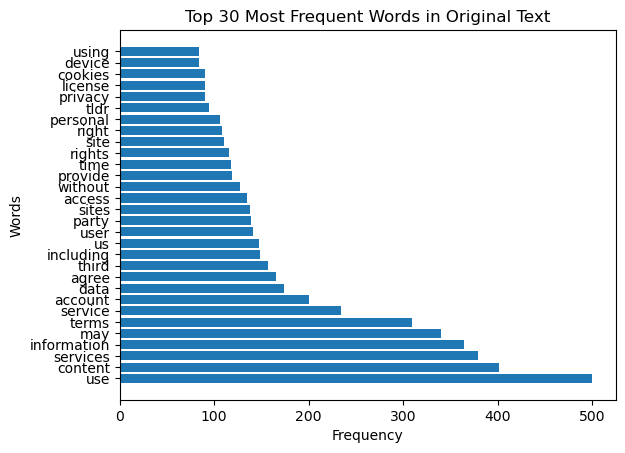

In [11]:
plt.barh(range(len(orig_top_words)), [val[1] for val in orig_top_words], align='center')
plt.yticks(range(len(orig_top_words)), [val[0] for val in orig_top_words])
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Words in Original Text')
plt.show()

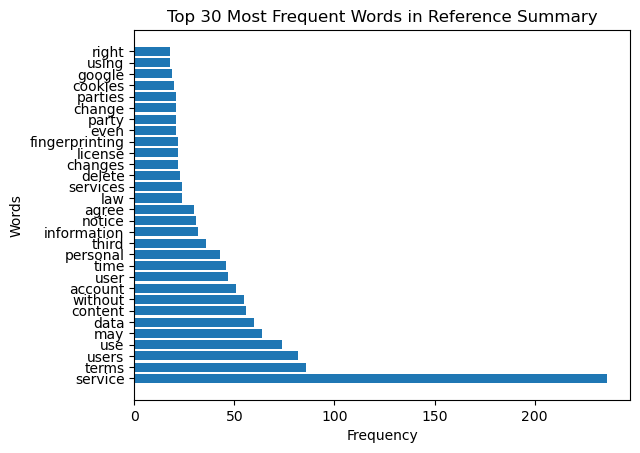

In [12]:
plt.barh(range(len(ref_top_words)), [val[1] for val in ref_top_words], align='center')
plt.yticks(range(len(ref_top_words)), [val[0] for val in ref_top_words])
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Words in Reference Summary')
plt.show()

In [13]:
df['Original_text_word_count'] = df['original_text'].apply(lambda x: len(x.split()))
df['reference_summary_word_count'] = df['reference_summary'].apply(lambda x: len(x.split()))

In [14]:
df.head()

,original_text,reference_summary,Original_text_word_count,reference_summary_word_count
0,welcome to the pokémon go video game services ...,hi,81,1
1,by using our services you are agreeing to thes...,by playing this game you agree to these terms ...,85,23
2,if you want to use certain features of the ser...,you have to use google pokemon trainer club or...,561,39
3,during game play please be aware of your surro...,don t die or hurt others and if you do it s no...,324,15
4,subject to your compliance with these terms ni...,don t copy modify resell distribute or reverse...,651,11


In [25]:
orig_mean = round(df['Original_text_word_count'].mean(), 2)
orig_max = round(df['Original_text_word_count'].max(), 2)
orig_min = round(df['Original_text_word_count'].min(), 2)
print('For the Original Text')
print('Minimum number of words:', orig_min)
print('Maximum number of words:', orig_max)
print('Mean:', orig_mean)

For the Original Text
Minimum number of words: 7
Maximum number of words: 1077
Mean: 101.89


In [24]:
ref_mean = round(df['reference_summary_word_count'].mean(), 2)
ref_max = round(df['reference_summary_word_count'].max(), 2)
ref_min = round(df['reference_summary_word_count'].min(), 2)
print('For the Reference Summary')
print('Minimum number of words:', ref_min)
print('Maximum number of words:', ref_max)
print('Mean:', ref_mean)

For the Reference Summary
Minimum number of words: 1
Maximum number of words: 80
Mean: 15.96


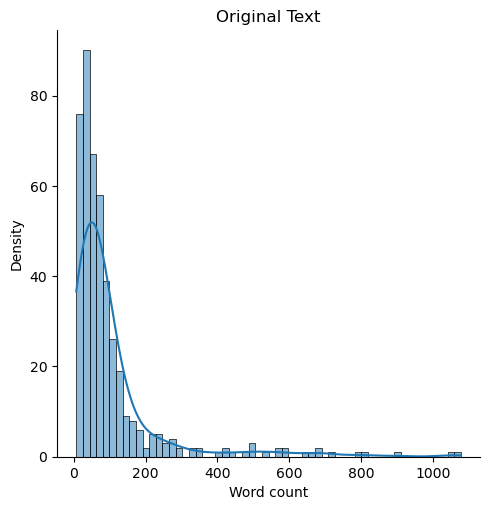

In [16]:
sns.displot(df['Original_text_word_count'], kde = True)
plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Original Text')
plt.show()

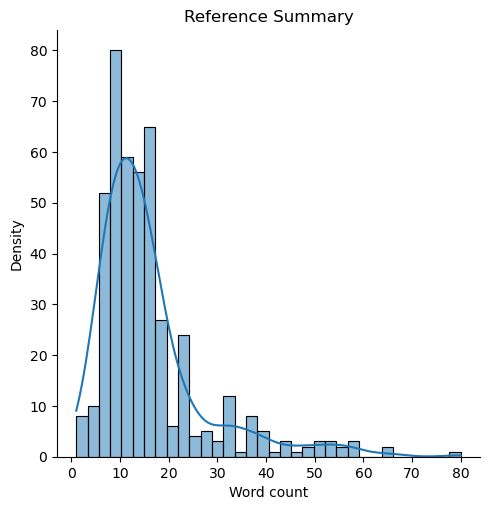

In [17]:
sns.displot(df['reference_summary_word_count'], kde = True)
plt.xlabel('Word count')
plt.ylabel('Density')
plt.title('Reference Summary')
plt.show()